In [33]:
# import data from mat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import dlib
import glob
from math import cos, sin
import os
# from PIL import image, ImageFilter
import pandas as pd

In [55]:
# debug on a picture
img_mat = sio.loadmat('resources/300W-3D/AFW/134212_1.mat')
landmarks = img_mat['pt2d']
landmarks.shape
labels = img_mat['Pose_Para'][0][:3]
pitch, yaw, roll = labels
pitch_, yaw_, roll_ = pitch, -yaw, roll

In [56]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

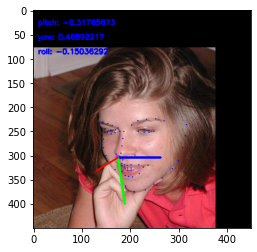

In [57]:
# show the image on matplotlib
capture = cv2.VideoCapture('resources/300W-3D/AFW/134212_1.jpg')
ret, frame = capture.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# draw the landmarks
for i in range(0, 68):
    x = int(landmarks[0, i])
    y = int(landmarks[1, i])
    cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
# draw the pitch, yaw, roll
cv2.putText(frame, 'pitch: ' + str(pitch), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
cv2.putText(frame, 'yaw: ' + str(yaw), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
cv2.putText(frame, 'roll: ' + str(roll), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
# draw axis

nose_x, nose_y = landmarks[0,32], landmarks[1,32]
# draw the nose in pink
cv2.circle(frame, (int(nose_x), int(nose_y)), 5, (255, 0, 255), -1)


plt.imshow(draw_axis(frame, yaw_, pitch_, roll_, nose_x, nose_y))


# show the image
# plt.imshow(frame)
plt.show()


In [ ]:
# we still need to train a model to do the pose estimation
# show testing results
# turn all code into shell script
# turn all code into python functions